# Red Wine Quality Classification


In [28]:
import warnings
warnings.filterwarnings('ignore')  

In [29]:
import tensorflow as tf
print(tf.__version__)

1.4.0


### Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
print(sklearn.__version__)

0.19.1


### Dataset Importing 

In [31]:
Class_type = 'multi-class'

if Class_type == 'multi-class':
    dataset = pd.read_csv("winequality-red.csv")
    avg = 'weighted'
elif Class_type == 'binary':
    dataset = pd.read_csv("winequality-red-binary.csv")
    avg = 'binary'

X_cols = list(dataset.columns)
del(X_cols[-1])

col1 = 0
col2 = 11

X = dataset.iloc[:,col1:col2].values
y = dataset.iloc[:,-1].values


### Splitting Up Data Into Training and Test Sets

In [32]:
from sklearn.model_selection import train_test_split
X_train_old, X_test_old, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

### Creating Classifier Instance List & Parameter Grid

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Classifiers and Their Parameter Grids For the Grid Search Algorithm ###

cfs = [LogisticRegression(),
       KNeighborsClassifier(),
       SVC(),
       DecisionTreeClassifier(),
       RandomForestClassifier()
       ]

cf_title = ['Logistic Regression',
            'K-Nearest Neighbors',
            'Kernel SVM', 
            'Decision Tree', 
            'Random Forest']

### Parameter Range Grid For Each Classifier ###

cfs_grid_params = [[{"penalty":['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
              [{'n_neighbors' : [3,5,11,15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}],
              [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
              [{"criterion": ['gini', 'entropy'], "max_depth": list(range(2,30,1)), "min_samples_leaf": list(range(5,20,1))}],
              [{"bootstrap": [True, False], "max_depth": list(range(2,10,1)), "min_samples_leaf": list(range(5,20,1))}]]

## Feature Selection

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [35]:
feature_list = []

print('Old shape of dataset = ')
print(X_train_old.shape)

featmodel = ExtraTreesClassifier(n_estimators=100)
featmodel = featmodel.fit(X_train_old,y_train)
print("feature importances: ", featmodel.feature_importances_)
model = SelectFromModel(featmodel,prefit=True)
feature_idx = model.get_support(indices = True)
for i in feature_idx:
    feature_list.append(X_cols[i])
print('Features: ', X_cols)

X_train = model.transform(X_train_old)
X_test = model.transform(X_test_old)

print('New shape of dataset = ', X_train.shape)
print('Selected Features:', feature_list) 

Old shape of dataset = 
(1119, 11)
feature importances:  [0.07904016 0.09931327 0.08375784 0.07624343 0.07645234 0.07480153
 0.10225433 0.08383138 0.07849886 0.10555729 0.14024958]
Features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
New shape of dataset =  (1119, 4)
Selected Features: ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating Classifiers

In [37]:
from sklearn.model_selection import GridSearchCV

### Grid Search Algorithm Facilitator Function ###

def grid_search_cf(classifier_name, classifier, cf_params, x_train, y_train, cv):
        grid_clf = GridSearchCV(classifier, cf_params, cv=cv)
        grid_clf.fit(x_train, y_train)
        grid_clf_est = grid_clf.best_estimator_
        print('Best Parameters for '+classifier_name+' Classifier:', grid_clf_est)
        print('Best Score for '+classifier_name+' Classifier:', grid_clf.best_score_)
        
        return grid_clf

## Predicting, Visualizing and Evaluating Classifier Performance

Best Parameters for Logistic Regression Classifier: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best Score for Logistic Regression Classifier: 0.579088471849866


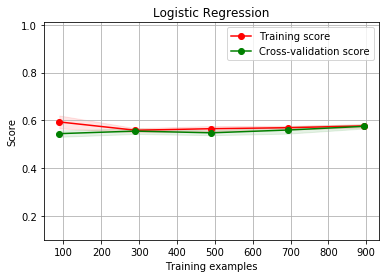

### Accuracy/Precision/Recall ###


The accuracy for the Logistic Regression classifier was: 0.6208333333333333
The precision for the Logistic Regression classifier was: 0.5823480598410472
The recall for the Logistic Regression classifier was: 0.6208333333333333
The f1 score for the Logistic Regression classifier was: 0.5963177408240796


Best Parameters for K-Nearest Neighbors Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='distance')
Best Score for K-Nearest Neighbors Classifier: 0.6434316353887399


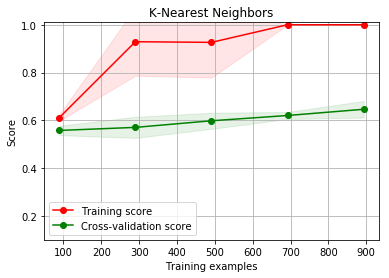

### Accuracy/Precision/Recall ###


The accuracy for the K-Nearest Neighbors classifier was: 0.6708333333333333
The precision for the K-Nearest Neighbors classifier was: 0.6466307023034144
The recall for the K-Nearest Neighbors classifier was: 0.6708333333333333
The f1 score for the K-Nearest Neighbors classifier was: 0.6578760094878402


Best Parameters for Kernel SVM Classifier: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Score for Kernel SVM Classifier: 0.5880250223413762


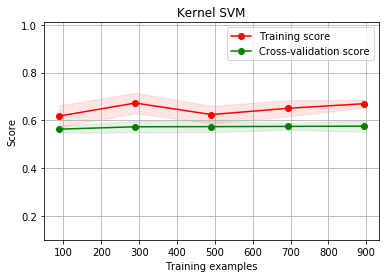

### Accuracy/Precision/Recall ###


The accuracy for the Kernel SVM classifier was: 0.6229166666666667
The precision for the Kernel SVM classifier was: 0.5929875842632442
The recall for the Kernel SVM classifier was: 0.6229166666666667
The f1 score for the Kernel SVM classifier was: 0.6006717584710198


Best Parameters for Decision Tree Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best Score for Decision Tree Classifier: 0.579982126899017


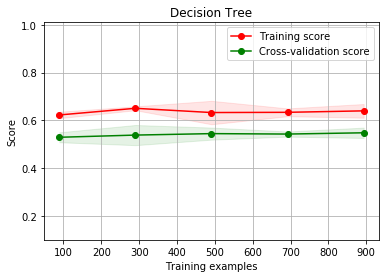

### Accuracy/Precision/Recall ###


The accuracy for the Decision Tree classifier was: 0.5604166666666667
The precision for the Decision Tree classifier was: 0.5359600421497225
The recall for the Decision Tree classifier was: 0.5604166666666667
The f1 score for the Decision Tree classifier was: 0.5472800204350236


Best Parameters for Random Forest Classifier: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Score for Random Forest Classifier: 0.6076854334226989


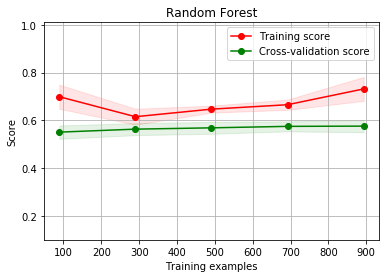

### Accuracy/Precision/Recall ###


The accuracy for the Random Forest classifier was: 0.6354166666666666
The precision for the Random Forest classifier was: 0.604765476673649
The recall for the Random Forest classifier was: 0.6354166666666666
The f1 score for the Random Forest classifier was: 0.6197114625723904






### FINAL RESULTS ###


The best accuracy for the dataset belonged to the K-Nearest Neighbors classifier with a value of: 0.6708333333333333
The best precision for the dataset belonged to the K-Nearest Neighbors classifier with a value of: 0.6466307023034144
The best recall for the dataset belonged to the K-Nearest Neighbors classifier with a value of: 0.6708333333333333
The best F1 score for the dataset belonged to the K-Nearest Neighbors classifier with a value of: 0.6578760094878402


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, StratifiedKFold
from matplotlib.colors import ListedColormap
acc = []
ps = []
rs = []
f_1 = []

cv = StratifiedKFold(n_splits=5)

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=cv,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores= \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")


#### THE FOLLOWING FUNCTION IS FOR VISUALIZING THE DECISION BOUNDARY FOR 2 FEATURES (REQUIRES MODIFICATION AT THE TOP) ####   
def Decision_boundary_plot(X_data, y_data, cf_title, classifier, x_label, y_label, title_string):
    X_set, y_set = X_data, y_data
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title_string)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

for classifier in range(0, len(cfs)):
    
    ####### COMPUTING GRID SEARCH FOR HYPERPARAMETER TUNING AND TRAINING SET FITTING FOR EACH CLASSIFIER #######
    grid_clf = grid_search_cf(cf_title[classifier], cfs[classifier],cfs_grid_params[classifier], X_train, y_train, cv=cv)
    
    ####### PREDICTING TEST SET RESULTS #######
    y_pred = grid_clf.predict(X_test)
    
    ####### UNCOMMENT THIS FOR VISUALIZING DECISION BOUNDARY FOR 2 FEATURES #######
    #title_string_train = 'Classifier: '+cf_title[classifier]+' (Training Set)'
    #title_string_test = 'Classifier: '+cf_title[classifier]+' (Test Set)'
    #Only use the decision boundary plot when visualizing using two features
    #Decision_boundary_plot(X_train, y_train, cf_title[classifier], cfs[classifier], X_cols[col1], X_cols[col1+1], 'Decision Boundary for '+title_string_train)
    #Decision_boundary_plot(X_test, y_test, cf_title[classifier], cfs[classifier], X_cols[col1], X_cols[col1+1], 'Decision Boundary for '+title_string_test)
    
    ####### VISUALIZING TRAINING AND CROSS VALIDATION SET PERFORMANCE #######
    plot_learning_curve(grid_clf, cf_title[classifier], X_train, y_train, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
    plt.show()
    
    ####### EVALUATING MODEL PERFORMANCE #######
    acc.append(accuracy_score(y_test, y_pred))
    ps.append(precision_score(y_test, y_pred, average = avg))
    rs.append(recall_score(y_test, y_pred, average = avg))
    f_1.append(f1_score(y_test, y_pred, average = avg))
    print('### Accuracy/Precision/Recall ###')
    print('\n')
    print('The accuracy for the '+cf_title[classifier]+' classifier was: '+str(acc[classifier])) 
    print('The precision for the '+cf_title[classifier]+' classifier was: '+str(ps[classifier])) 
    print('The recall for the '+cf_title[classifier]+' classifier was: '+str(rs[classifier]))
    print('The f1 score for the '+cf_title[classifier]+' classifier was: '+str(f_1[classifier]))
    print('\n')
    print('==================================================================================')
    
    y_pred = None

####### FINAL RESULTS EVALUATION #######
max_ind_acc = acc.index(max(acc))
max_ind_ps = ps.index(max(ps))
max_ind_rs = rs.index(max(rs))
max_ind_f_1 = f_1.index(max(f_1))

print('\n')
print('==================================================================================')
print('==================================================================================')
print('==================================================================================')
print('\n')
print('### FINAL RESULTS ###')
print('\n')
print('The best accuracy for the dataset belonged to the '+cf_title[max_ind_acc]+' classifier with a value of: '+str(acc[max_ind_acc])) 
print('The best precision for the dataset belonged to the '+cf_title[max_ind_ps]+' classifier with a value of: '+str(ps[max_ind_ps])) 
print('The best recall for the dataset belonged to the '+cf_title[max_ind_rs]+' classifier with a value of: '+str(rs[max_ind_rs]))
print('The best F1 score for the dataset belonged to the '+cf_title[max_ind_f_1]+' classifier with a value of: '+str(f_1[max_ind_f_1]))